<a href="https://colab.research.google.com/github/ngingumuntu/email_sender/blob/main/page_view_time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page View Time Series Visualizer
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(
  'fcc-forum-pageviews.csv',
  header = 0,
  parse_dates = True,
  index_col = 'date'
)

# Clean data
df = df[
  (df['value'] >= df['value'].quantile(0.025))
  & (df['value'] <= df['value'].quantile(0.975))
]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


## Create line plot function

In [24]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (21, 8))
    sns.lineplot(
      x = 'date',
      y = 'value',
      ax = ax,
      data = df
    )
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save image
    fig.savefig('line_plot.png')


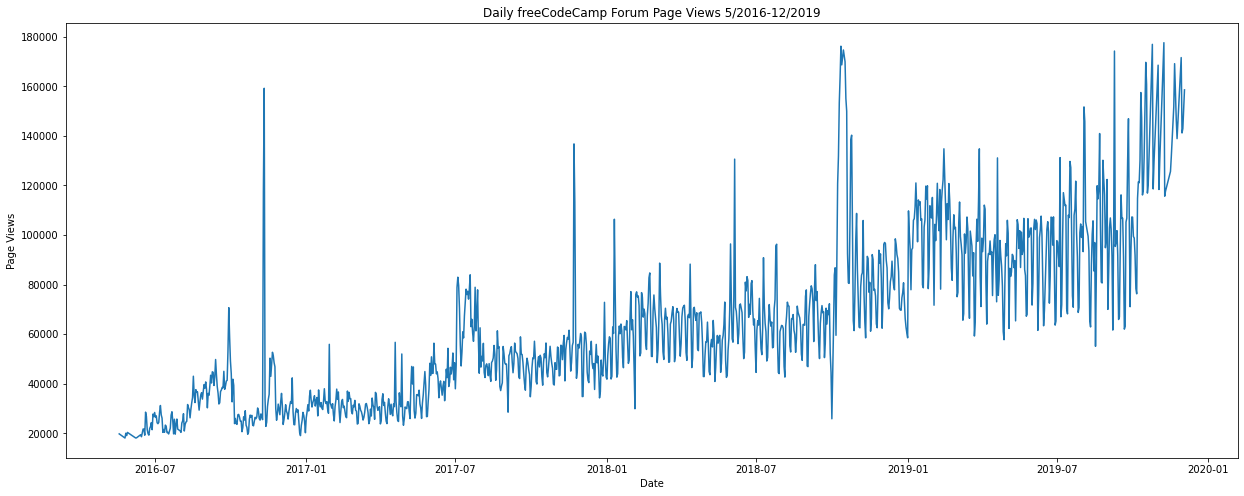

In [25]:
draw_line_plot()

## Create bar plot function

In [26]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
  
    df_bar = df_bar.groupby(['year', 'month']).agg('mean').reset_index()
    table = pd.pivot_table(
      df_bar,
      values = 'value',
      index = 'year',
      columns = 'month',
      dropna = False
    )
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    table = table.reindex(columns = months)
  
    # Draw bar plot
    ax = table.plot(
      kind = 'bar',
      figsize = (21, 8),
      xlabel = 'Years',
      ylabel = 'Average Page Views'
    )
    fig = ax.get_figure()

    # Save image
    fig.savefig('bar_plot.png')

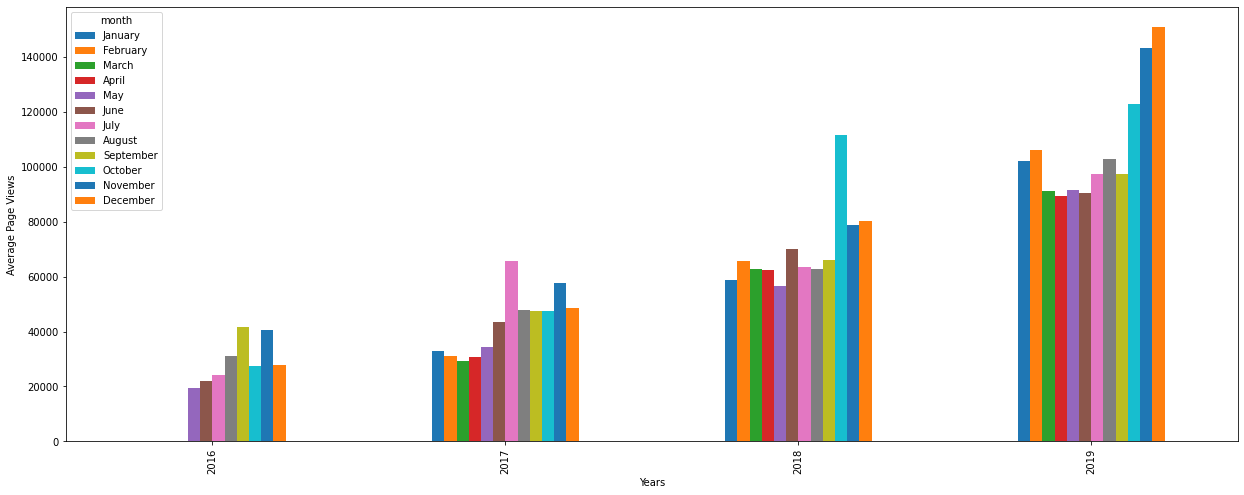

In [27]:
draw_bar_plot()

## Create box plot function

In [21]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (21, 8))
    sns.boxplot(
      x = 'year',
      y = 'value',
      data = df_box,
      ax = ax1
    ).set(
      title = 'Year-wise Box Plot (Trend)',
      xlabel = 'Year',
      ylabel = 'Page Views'
    )
    sns.boxplot(
      x = 'month',
      y = 'value',
      data = df_box,
      ax = ax2,
      order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ).set(
      title = 'Month-wise Box Plot (Seasonality)',
      xlabel = 'Month',
      ylabel = 'Page Views'
    )

    # Save image
    fig.savefig('box_plot.png')

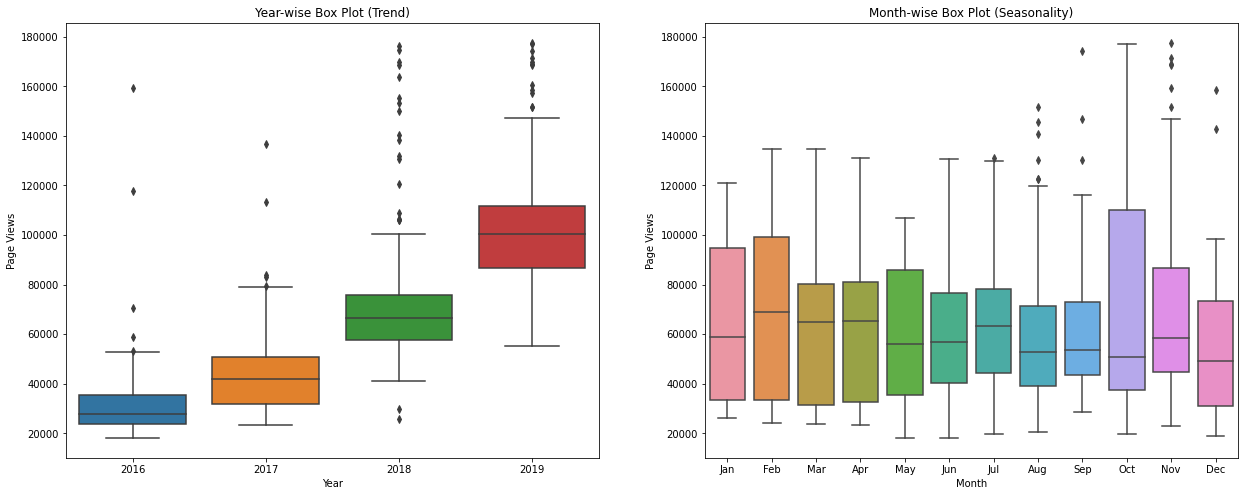

In [22]:
draw_box_plot()